In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [84]:
def assign(dataset, medoids):
    """
    Time complexity: O(K*N)
    """
    K = len(medoids)
    clusters = [[] for _ in range(K)]
    assigned = [np.sum((np.tile(d, (K, 1)) - medoids)**2,
                       axis=1).argmin() for d in dataset]
    for i, c in enumerate(assigned):
        clusters[c].append(dataset[i])
    return assigned, list(map(np.array, clusters))


def cost(clusters, seeds):
    """
    Time complexity: O(N)
    """
    K = len(seeds)
    c = 0
    for k in range(K):
        cluster = clusters[k]
        c += np.sum((np.tile(seeds[k], (len(cluster), 1)) - cluster)**2)
    return c

In [85]:
K = 3
NPARTITIONS = 10
columns = ['instrumentalness', 'liveness']

df = pd.read_csv('./dataset/spotify.csv')[columns]
dataset_total = df.to_numpy()
idx_sample = np.random.choice(
    len(dataset_total), len(dataset_total)//NPARTITIONS, replace=False)
dataset = dataset_total[idx_sample]
seeds = [x for x in range(0, len(dataset), len(dataset)//K)][:K]
medoids = dataset[seeds]

In [86]:
# CLARA (Clustering Large Applications) Method

seeds = medoids
t = 0
tcs = [None for _ in range(K)]
changed = True

while changed:
    t += 1
    changed = False
    _, clusters = assign(dataset, seeds)
    old_cost = cost(clusters, seeds)
    next_seeds = seeds.copy()
    for k in tqdm(range(K), desc=f'{t}/ TC: {tcs}'):
        new_seeds = seeds.copy()
        idx_o = random.randint(0, len(clusters[k])-1)
        new_seeds[k] = clusters[k][idx_o]
        _, new_clusters = assign(dataset, new_seeds)
        new_cost = cost(new_clusters, new_seeds)
        tc = new_cost - old_cost
        tcs[k] = round(tc, 1)
        if tc < 0:
            next_seeds[k] = new_seeds[k]
            changed = True
    seeds = next_seeds

medoids = seeds
_, clusters = assign(dataset_total, medoids)

8/ TC: [-2.0, 1.2, 0.6]: 100%|██████████| 3/3 [00:00<00:00, 57.96it/s]


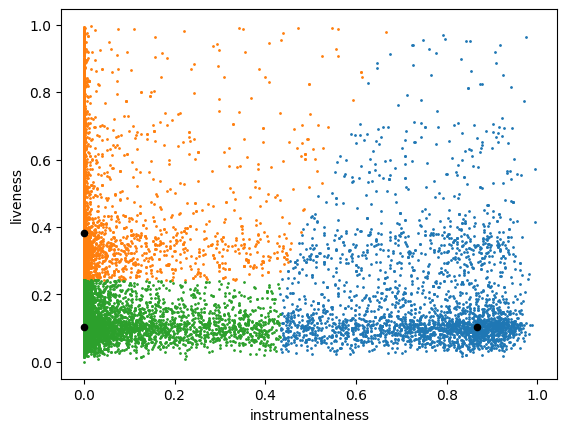

In [87]:
for c in clusters:
    plt.scatter(c.T[0], c.T[1], s=1)
for m in medoids:
    plt.scatter(m[0], m[1], s=20, c='black')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()